<div class="alert alert-block alert-info">
<ul>
<li>Course: Machine Learning</li>
<li>Project: 01</li>
<li>Team members</li>
<li>Mauro Travieso Pena</li>
<li>Quoc Huy Luong</li>
<li>Ngoc Bao Tran</li>
<ul>
</div>



# Classification with Decision Tree

<div class="alert alert-block alert-info">
Some comments here 
</div>


# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb 
import functions as myLib
import myPlot as myPlotLib



importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from myPlot.ipynb


# Load data from files

In [2]:
RawData = pd.read_csv('../data/anime.csv')


#### Clean and Transform Data

In [3]:
Cleaned_Data = myLib.myCleanAndTransformData(RawData)
Y_Data = Cleaned_Data['Class']
X_Data = Cleaned_Data.drop(columns=['Class'])


#### Normalize  Data

In [4]:
Normalized_Data = myLib.myNormalize(X_Data)

#### PCA

In [5]:
n_components=10
PCA_Data = myLib.myPCA(Normalized_Data,n_components)
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.311566,0.786508,-0.420812,0.006372,-0.078184,-0.052412,-0.060391,0.015855,-0.042522,0.021338
1,-0.284842,0.763991,-0.412010,-0.010867,-0.110120,-0.085189,-0.096289,0.050942,-0.193684,0.012005
2,-0.284838,0.767911,-0.395571,-0.007165,-0.091581,-0.055802,-0.061051,0.024307,-0.099036,-0.013173
3,-0.291600,0.777174,-0.408320,-0.000907,-0.081591,-0.053041,-0.057354,0.030456,-0.068009,0.063762
4,0.732145,-0.153155,-0.102203,-0.458312,0.816807,0.046023,0.015681,-0.064732,0.014039,0.004270


####----------------------------------------------------------------
# Decision Tree Classification 
####----------------------------------------------------------------

In [6]:
Y_Data.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [7]:
X_Data.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Normalized_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034673,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
PCA_Data.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.311566,0.786508,-0.420812,0.006372,-0.078184,-0.052412,-0.060391,0.015855,-0.042522,0.021338
1,-0.284842,0.763991,-0.412010,-0.010867,-0.110120,-0.085189,-0.096289,0.050942,-0.193684,0.012005
2,-0.284838,0.767911,-0.395571,-0.007165,-0.091581,-0.055802,-0.061051,0.024307,-0.099036,-0.013173
3,-0.291600,0.777174,-0.408320,-0.000907,-0.081591,-0.053041,-0.057354,0.030456,-0.068009,0.063762
4,0.732145,-0.153155,-0.102203,-0.458312,0.816807,0.046023,0.015681,-0.064732,0.014039,0.004270


####----------------------------------------------------------------
#### Split Original Data
####----------------------------------------------------------------

In [10]:
X_train, X_test, y_train, y_test  = myLib.mySplitData(X_Data,Y_Data,0.33,42)

X_train.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
32729,2,132,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24946,2,7051,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8676,50,65896,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13244,52,67936,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29384,15,49,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,...,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
22373,10,3331,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10508,12,28423,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11570,1,5078,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22262,1,390,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,15,482268,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [13]:
y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split Original Normalized_Data
####----------------------------------------------------------------

In [14]:
Normalized_X_train, Normalized_X_test, Normalized_y_train, Normalized_y_test  = myLib.mySplitData(Normalized_Data,Y_Data,0.33,42)

Normalized_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
32729,0.000550,0.000118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24946,0.000550,0.006942,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8676,0.026968,0.064980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13244,0.028068,0.066992,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29384,0.007705,0.000036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
Normalized_X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
22373,0.004953,0.003273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10508,0.006054,0.028021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11570,0.000000,0.004997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22262,0.000000,0.000373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
734,0.007705,0.475642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Normalized_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [17]:
Normalized_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
#### Split  PCA_Data
####----------------------------------------------------------------

In [18]:
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test  = myLib.mySplitData(PCA_Data,Y_Data,0.33,42)

PCA_X_train.head()

,0,1,2,3,4,5,6,7,8,9
32729,-0.222553,0.292974,0.905567,-0.155999,-0.107815,-0.031082,-0.021299,0.048706,-0.030090,-0.014706
24946,-0.645160,-0.559037,-0.134427,-0.006441,-0.054570,-0.037354,-0.022870,-0.011349,-0.028818,-0.003686
8676,0.697664,-0.148216,-0.076748,-0.038938,-0.073444,-0.032917,-0.020417,0.017035,-0.032058,0.000822
13244,0.704242,-0.156341,-0.072758,-0.052547,-0.100729,-0.057207,-0.031382,0.064586,-0.051295,0.045811
29384,0.702786,-0.119935,-0.090780,-0.061061,-0.137326,-0.103949,-0.122647,0.079680,-0.322721,-0.706440


In [19]:
PCA_X_test.head()

,0,1,2,3,4,5,6,7,8,9
22373,-0.124244,0.125881,0.130227,0.039626,-0.039526,0.020460,0.271131,0.945099,0.299702,0.037552
10508,0.709171,-0.165193,-0.059534,-0.058438,-0.110796,-0.059636,-0.034922,0.059104,-0.082249,-0.031628
11570,-0.303163,0.781798,-0.421076,-0.036642,-0.226540,0.908909,0.064838,-0.184021,0.049645,0.006310
22262,-0.292558,0.765531,-0.409850,-0.008907,-0.110559,-0.083602,-0.095595,0.054067,-0.193311,0.009502
734,0.719919,-0.159429,-0.077183,-0.056621,-0.099810,-0.060473,-0.032800,0.058166,-0.052068,0.050979


In [20]:
PCA_y_train.head()

32729    1
24946    0
8676     1
13244    1
29384    1
Name: Class, dtype: int64

In [21]:
PCA_y_test.head()


22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

####----------------------------------------------------------------
# Model Training 
####----------------------------------------------------------------

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def myDT(clf,X_train,y_train,X_test,y_test,cv):
    #Fit the model
    #The maximum depth of the tree. 
    #If None, then nodes are expanded until all leaves are pure
    # or until all leaves contain less than min_samples_split samples.
    #min_samples_split: by default = 1
    clf.fit(X_train, y_train)
    #check accuracy of model on the test data
    score = clf.score(X_test, y_test)
    #Using CV
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
    return score,cv_scores,[clf.get_n_leaves(),clf.get_depth()]


In [23]:
def myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv):
    df = pd.DataFrame({"depth":[],"training_score":[],"cv_score":[]})
    for depth in depths:
        clf1 = DecisionTreeClassifier(max_depth=depth,random_state=0)
        score,cv_scores,params = myDT(clf1,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"depth":depth,"training_score":[score],"cv_score":[cv_scores.mean()]}),ignore_index=True)
    return df

In [24]:

cv = 10
clf = DecisionTreeClassifier(random_state=0)

#Original Data
score,cv_scores,params = myDT(clf,X_train,y_train,X_test,y_test,cv)
score

0.8474649220969269

In [25]:
cv_scores.mean()

0.8440044407457197

In [26]:
params

[3763, 42]

In [27]:
#Normalized Data
score,cv_scores,params = myDT(clf,Normalized_X_train,Normalized_y_train,Normalized_X_test,Normalized_y_test,cv)
score

0.8475510028406645

In [28]:
cv_scores.mean()

0.8438772681997513

In [29]:
params


[3763, 42]

In [30]:
#PCA Data
score,cv_scores,params = myDT(clf,PCA_X_train,PCA_y_train,PCA_X_test,PCA_y_test,cv)
score

0.7623310665404149

In [31]:
cv_scores.mean()

0.7520784547771189

In [32]:
params



[4707, 43]

####----------------------------------------------------------------
# Learning Curve
####----------------------------------------------------------------
#https://scikit-learn.org/stable/modules/learning_curve.html

In [33]:
splitsSize = np.linspace(0.04,0.99,20)

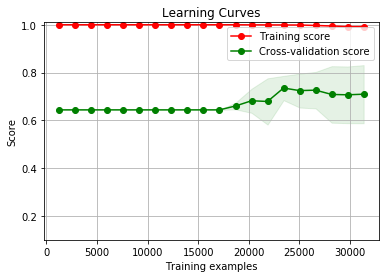

In [34]:
title = "Learning Curves"
myPlotLib.plot_learning_curve(clf, title, X_Data, Y_Data, ylim=(0.1, 1.01),train_sizes=splitsSize, cv=cv, n_jobs=4)
plt.show()


In [35]:
def myDT_LearningCurve(clf,X_Data,Y_Data,splits,cv):
    df = pd.DataFrame({"percent":[],"training_score":[],"cv_score":[]})
    for X in splits:
        X_train, X_test, y_train, y_test  = myLib.mySplitDataByTrainSize(X_Data,Y_Data,X,42)
        score,cv_scores,params = myDT(clf,X_train,y_train,X_test,y_test,cv)
        df = df.append(pd.DataFrame({"percent":X,"training_score":[score],"cv_score":[cv_scores.mean()]}),ignore_index=True)
    return df


In [36]:
learning_df= myDT_LearningCurve(clf,X_Data,Y_Data,splitsSize,cv)
learning_df

,percent,training_score,cv_score
0,0.04,0.751546,0.751413
1,0.09,0.763400,0.759796
2,0.14,0.767648,0.766431
3,0.19,0.780907,0.783784
4,0.24,0.793892,0.792489
5,0.29,0.798624,0.799766
6,0.34,0.809581,0.803476
7,0.39,0.808783,0.806090
8,0.44,0.816213,0.814115
9,0.49,0.830558,0.820676


In [37]:
learning_df.describe()

,percent,training_score,cv_score
count,20.000000,20.000000,20.000000
mean,0.515000,0.826844,0.819770
std,0.295804,0.042391,0.036268
min,0.040000,0.751546,0.751413
25%,0.277500,0.797441,0.797947
50%,0.515000,0.833314,0.823297
75%,0.752500,0.861474,0.849806
max,0.990000,0.903683,0.869347


Text(0.5, 1.0, 'Learning Curve of CV:10')

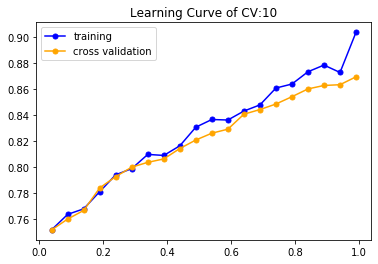

In [38]:

fig, ax = plt.subplots()
plt.plot(learning_df.percent, learning_df.training_score, color='blue', marker='o', markersize=5, label='training')

plt.plot(learning_df.percent, learning_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Learning Curve of CV:10")



####----------------------------------------------------------------
# Validation Curve
####----------------------------------------------------------------

In [39]:
depths = [1,2,4, 5, 8,10,15, 20,25,30,35,40,50,60,70,80,90,100,150,200]

In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(),X_train, y_train, 
    param_name="max_depth", param_range=depths,
    cv=cv, n_jobs=1)


In [41]:
train_scores

array([[0.76126084, 0.7623086 , 0.76122497, 0.76161312, 0.76095355,
        0.76133044, 0.76151889, 0.76217846, 0.761566  , 0.75949307],
       [0.78929514, 0.79005889, 0.79081272, 0.78945633, 0.78997456,
        0.79021012, 0.79086969, 0.79105814, 0.79025723, 0.7881843 ],
       [0.80785903, 0.80706714, 0.80805654, 0.80655799, 0.80599265,
        0.80731179, 0.80495619, 0.80669933, 0.80594554, 0.80439084],
       [0.81073313, 0.80881037, 0.80923439, 0.80924338, 0.80900782,
        0.81027985, 0.80641666, 0.80919627, 0.80848959, 0.80759446],
       [0.82755371, 0.82704358, 0.82657244, 0.82582682, 0.82625082,
        0.82917177, 0.82219919, 0.82719307, 0.82450768, 0.82719307],
       [0.84757821, 0.84584217, 0.84650177, 0.84547253, 0.84514275,
        0.84990106, 0.83996043, 0.84500141, 0.84551965, 0.84575521],
       [0.90298718, 0.90025913, 0.90690224, 0.89955715, 0.90356167,
        0.90167719, 0.89070008, 0.89790823, 0.89451616, 0.89913314],
       [0.94685262, 0.95015312, 0.9536395

In [42]:
valid_scores


array([[0.76016949, 0.75074184, 0.76049173, 0.75699746, 0.76293469,
        0.75954198, 0.77184054, 0.7519084 , 0.75742154, 0.77608142],
       [0.79237288, 0.78550233, 0.78126325, 0.79092451, 0.78880407,
        0.7841391 , 0.79177269, 0.77905004, 0.78625954, 0.80322307],
       [0.80550847, 0.7990674 , 0.80076304, 0.80322307, 0.80364716,
        0.80237489, 0.81552163, 0.79728584, 0.80364716, 0.80746395],
       [0.80847458, 0.80161085, 0.79991522, 0.80661578, 0.80407125,
        0.80703986, 0.81509754, 0.80195081, 0.80958439, 0.80110263],
       [0.82033898, 0.8041543 , 0.80754557, 0.81467345, 0.81212892,
        0.81764207, 0.81891433, 0.80491942, 0.82103478, 0.81594572],
       [0.82161017, 0.80669775, 0.80542603, 0.82400339, 0.81552163,
        0.82315522, 0.82909245, 0.80873622, 0.82442748, 0.82485157],
       [0.84322034, 0.83298008, 0.81475201, 0.84139101, 0.83248516,
        0.84223919, 0.84139101, 0.81891433, 0.83248516, 0.8273961 ],
       [0.85      , 0.84230606, 0.8291649

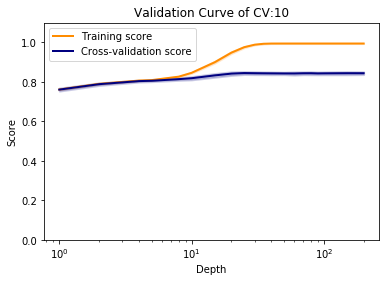

In [43]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve of CV:10")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(depths, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(depths, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(depths, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(depths, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


####----------------------------------------------------------------
# Model Turning
####----------------------------------------------------------------

In [44]:
learnig_df= myDT_ModelTurning(clf,depths,X_train,y_train,X_test,y_test,cv)
learnig_df

,depth,training_score,cv_score
0,1.0,0.771197,0.760813
1,2.0,0.788414,0.788331
2,4.0,0.808212,0.803850
3,5.0,0.810106,0.805546
4,8.0,0.815959,0.813815
5,10.0,0.818714,0.818522
6,15.0,0.833950,0.832047
7,20.0,0.843075,0.840782
8,25.0,0.847723,0.843368
9,30.0,0.848067,0.843580


In [45]:
learnig_df.describe()

,depth,training_score,cv_score
count,20.000000,20.000000,20.000000
mean,49.750000,0.832853,0.829550
std,53.155061,0.022938,0.023673
min,1.000000,0.771197,0.760813
25%,9.500000,0.818025,0.817345
50%,32.500000,0.846948,0.843623
75%,72.500000,0.847465,0.844004
max,200.000000,0.848067,0.844640


Text(0.5, 1.0, 'Training and Cross validation scores of CV:10')

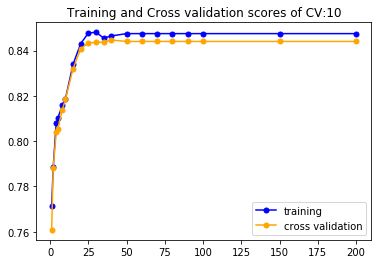

In [46]:

fig, ax = plt.subplots()
plt.plot(learnig_df.depth, learnig_df.training_score, color='blue', marker='o', markersize=5, label='training')

plt.plot(learnig_df.depth, learnig_df.cv_score, color='orange', marker='o', markersize=5, label='cross validation')

ax.legend()
ax.set_title("Training and Cross validation scores of CV:10")


<div class="alert alert-block alert-info">
Based on the plot, we saw that 
</div>


####----------------------------------------------------------------
# Grid Search CV
####----------------------------------------------------------------

In [47]:
#GridSearchCV
def myGS(X_train,y_train,depths,num_leafs):
    from sklearn.model_selection import GridSearchCV
    
    param_grid = [{'max_depth':depths,
                  'min_samples_leaf':num_leafs}]
    clf2 = DecisionTreeClassifier(random_state=0)
    gs = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=10)
    
    gs = gs.fit(X_train, y_train)
    return gs
    

In [ ]:
depths = [1,2,4, 5, 8, 10,15, 20,25,30,35,40]
num_leafs = [1,2,4, 5, 8, 10, 20]
gs = myGS(X_train,y_train,depths,num_leafs)
#Training Score
gs.best_score_

In [ ]:
gs.best_params_
    

####----------------------------------------------------------------
# Final Evaluation
####----------------------------------------------------------------

In [ ]:
clf = DecisionTreeClassifier(random_state=0,max_depth=gs.best_params_['max_depth'],min_samples_leaf=gs.best_params_['min_samples_leaf'])
#Original Data
score,cv_scores,params = myDT(clf,X_train,y_train,X_test,y_test,cv)
score

In [ ]:
cv_scores.mean()

In [ ]:
params
